# HW1. Advanced ML  
Мышлянов Алексей, MADE-DS-21

# Часть I

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем
считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь
принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так
получилось, что у подсудимого как раз эта редкая группа крови!  
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно
такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью
99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие
вероятности он оценил, а какие должен был оценить.

Прокурор опирается на вероятности двух событий:  
1. касаемо редкой группы крови подсудимого ($B$)
2. подсудимый невиновен ($A$)
  
Он оценил вероятность: $$          
P(B|A) = 0.01 $$           
Затем он утвержает, что: $$          
P(B|\overline{A}) = 1 - P(B|A) = 0.99 $$          
На самом деле ему надо было оценить вероятность:       
$$ P(\overline{A}|B) = \frac{P(B|\overline{A}) \cdot P(\overline{A})}{P(B)} $$
<br/><br/><br/><br/>

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе
живёт миллион человек. Это значит, что примерно у 10000 из них такая группа
крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил
убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не
является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность
того, что мой подзащитный виновен, так что предлагаю исключить его из
материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие
должен был оценить?

Вновь обозначим события:
1. У человека редкая группа крови ($B$)
2. Случайный человек убийца ($A$)
  
Адвокат оценил: $$           
P(A|B) = 0.0001$$          
Пробуем оценить самостоятельно: $$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{1 \cdot \frac{1}{1000000}}{0.01} = 0.0001 $$          
Опираясь на рассуждения только о группе крови убийцы, рассуждения кажутся правильными. Однако предположение о том, что любой случаный человек может быть убийцей, кажется достаточно сильным. Возможно, стоило бы оценить дополнительные вероятности для конкретного подсудимого.  
<br/><br/><br/><br/>

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по
предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки
5% в обе стороны. Мы видели, что в результате человек с положительным тестом
имеет апостериорную вероятность оказаться больным всего лишь около 16%. <br/><br/>
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное
исследование и улучшить качество теста. Но сил и денег хватит только для того,
чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives
(когда тест выдаёт положительный результат у здорового человека), или только
число false negatives (когда тест выдаёт отрицательный результат у больного).<br/><br/>
Помогите медикам: постройте зависимости апостериорной вероятности болезни
после положительного и отрицательного теста от обоих видов ошибок (например, в
виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше
сосредоточиться?

Примем:
* $P$ - позитивный результат теста
* $N$ - негативный результат теста
* $S$ - пациент болен  
* $p_1$ - вероятность ложноположительного результата (false positive)
* $p_2$ - вероятность ложноотрицательного результата (false negative)
* Правильный результат в случае болезни $p(P|S) = 1 - p_1$
* Правильный результат в случае здоровья $p(N|\overline{S}) = 1 - p_2$

Оценим вероятности:
$$ p(S|P) = \frac{p(P|S) \cdot p(S)}{p(P)} = \frac{1 - p_1 \cdot p(S)}{(1 - p_1) \cdot p(S) + p_1 \cdot p(\overline{S})} $$ 
<br/>  
$$ p(S|N) = \frac{p(N|S) \cdot p(S)}{p(N)} = \frac{p_2 \cdot p(S)}{(1 - p_2) \cdot (1 - p(S)) + p_2 \cdot p(S)}$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def func1(false_positive, p_s):
    return ((1 - false_positive) * p_s) / ((1 - false_positive) * p_s + false_positive * (1 - p_s))

def func2(false_negative, p_s):
    return (false_negative * p_s) / ((1 - false_negative) * (1 - p_s) + false_negative * p_s)

In [60]:
initial_false_positive_proba = func1(0.05, 0.01)
initial_false_negative_proba = func2(0.05, 0.01)
print(f'Вероятность того, что человек болен при условии '
      f'положительного результата: {initial_false_positive_proba * 100:.1f}%\n'
      f'Вероятность того, что человек болен при условии '
      f'отрицательного результата: {initial_false_negative_proba * 100:.1f}%')

Вероятность того, что человек болен при условии положительного результата: 16.1%
Вероятность того, что человек болен при условии отрицательного результата: 0.1%


По первым предположениям разумнее оптимизировать ошибку первого рода (уменьшать false positive)  \
Посмотрим на графики

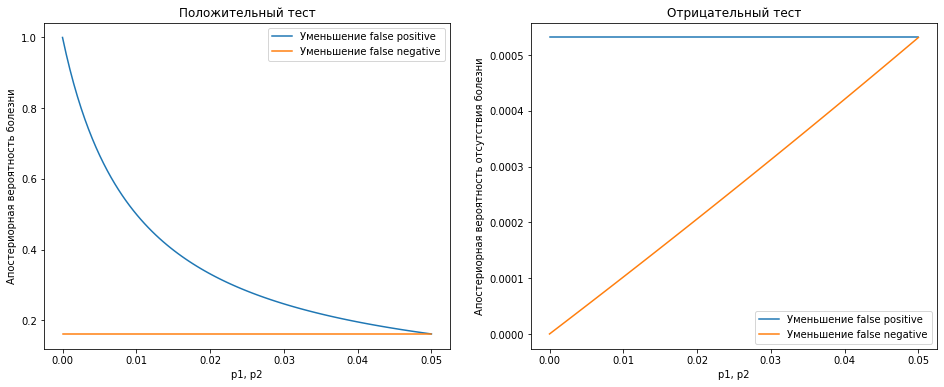

In [89]:
alphas = np.linspace(0.0, 0.05, 100)
const_alphas = np.array([0.05] * 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(alphas, func1(alphas, 0.01), label='Уменьшение false positive')
ax1.plot(alphas, func2(1 - const_alphas, 0.01), label='Уменьшение false negative')
ax1.set_ylabel('Апостериорная вероятность болезни')
ax1.set_title('Положительный тест')
ax1.set_xlabel('p1, p2')

ax2.plot(alphas, func1(1 - const_alphas, 0.01), label='Уменьшение false positive')
ax2.plot(alphas, func2(alphas, 0.01), label='Уменьшение false negative')
ax2.set_title('Отрицательный тест')
ax2.set_ylabel('Апостериорная вероятность отсутствия болезни')
ax2.set_xlabel('p1, p2')

ax1.legend()
ax2.legend();

 Как видно из графиков, лучше уменьшать вероятность ложноположительных ошибок (первого рода), что даст значительное увеличение апостериорной вероятности болезни после положительного теста. Уменьшение ошибки второго рода не дает такого же прироста апостериорной вероятности болезни после отрицательного теста.

# Часть II

### 1 пункт

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('owid-covid-data.csv')

In [209]:
data = data[(data['location'] == 'Russia') & (data['date'] >= '2020-03-03')]
data[data['new_cases'] <= 0]['new_cases'] = 1
data.reset_index(inplace=True)

In [211]:
train = data.iloc[:50]
test = data.iloc[50:]

### 2 пункт

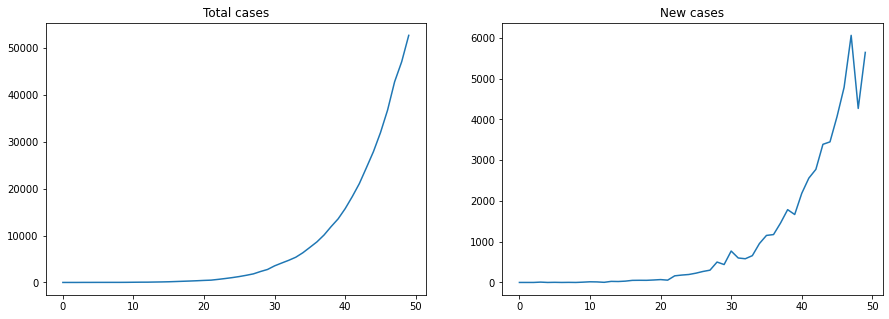

In [212]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(train['total_cases'])
ax1.set_title('Total cases')
ax2.plot(train['new_cases'])
ax2.set_title('New cases');

##### a) Строим линейную регрессию

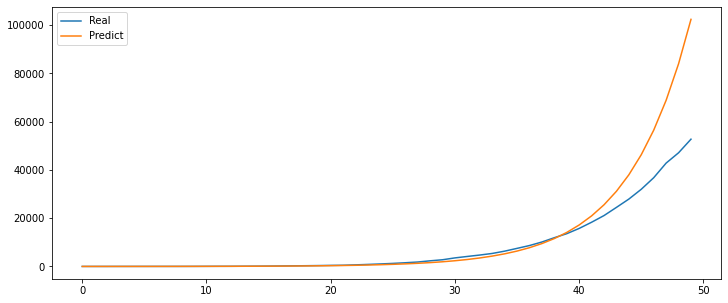

In [213]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X_train = train.index.values.reshape(-1, 1)
y_train = np.log(train['total_cases'])
lr.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
y_pred = np.exp(lr.predict(X_train))
plt.plot(train['total_cases'], label='Real')
plt.plot(y_pred, label='Predict')
plt.legend();

##### b) Ищем апостериорное распределение параметров

In [214]:
from sklearn.linear_model import Ridge

ALPHA = 1
lr_ridge = Ridge(alpha=ALPHA)
X_train = train.index.values.reshape(-1, 1)
y_train = np.log(train['total_cases'])
lr_ridge.fit(X_train, y_train)

real_y_ln = np.log(train['total_cases'])
pred_y_ln = lr_ridge.predict(X_train)
sigma = np.mean((real_y_ln - pred_y_ln) ** 2)

print(f'w1: {lr_ridge.coef_[0]}')
print(f'w0: {lr_ridge.intercept_}')

w1: 0.19827187061961965
w0: 1.8212036708332127


In [215]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), x) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), y))
    return mu_n, sigma_n

In [216]:
X = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
mu_0 = np.zeros(X.shape[1])
sigma_0 = sigma * np.eye(X.shape[1])
mu, sigma = bayesian_update(mu_0, sigma_0, X, y_train, sigma)
print(f'mu: {mu}')
print(f'sigma: {sigma}')

mu: [1.80373123 0.19880564]
sigma: [[ 1.14168046e-03 -3.45962734e-05]
 [-3.45962734e-05  1.41553351e-06]]


##### c) Сэмплируем

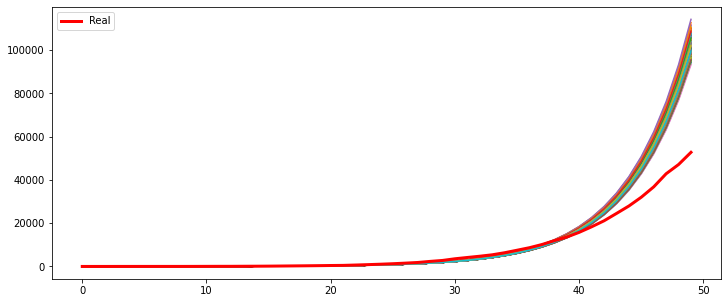

In [217]:
N_SAMPLES = 500

plt.figure(figsize=(12, 5))
sampled_w = np.random.multivariate_normal(mu, sigma, N_SAMPLES)
for (w0, w1) in sampled_w:
    y_pred = X_train * w1 + w0
    plt.plot(np.exp(y_pred))
plt.plot(np.exp(y_train), color='red', linewidth=3, label='Real')
plt.legend();

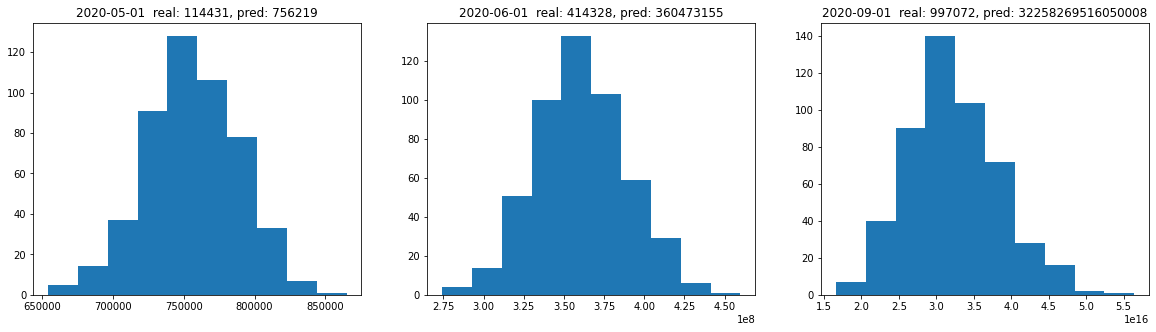

In [218]:
may_1 = '2020-05-01'
june_1 = '2020-06-01'
sept_1 = '2020-09-01'

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
days_to_prognose = [may_1, june_1, sept_1]
for i, each in enumerate(days_to_prognose):
    X = (pd.to_datetime(each) - pd.to_datetime(train.iloc[0] ['date'])).days
    y_pred = np.exp(X * sampled_w[:, 1] + sampled_w[:, 0])
    real_value = int(test[test["date"] == each]["total_cases"].values[0])
    ax[i].hist(y_pred)
    ax[i].set_title(each + f'  real: {real_value}, pred: {int(y_pred.mean())}')

### 3 пункт

Продифференцировав функцию, можно представить в виде полинома второй степени в показателе степени экспоненты.  
Таким образом, $$           
ln(y) = ax^2 + bx + c$$  
Однако теперь y = new_cases

##### b) обучаем 

In [232]:
ALPHA = 1
lr_ridge = Ridge(alpha=ALPHA, fit_intercept=False)

X_train = np.hstack((np.ones(train.shape[0]).reshape(-1, 1), 
                     train.index.values.reshape(-1, 1), 
                     (train.index.values ** 2).reshape(-1, 1)))
y_train = np.log(train['new_cases'])

lr_ridge.fit(X_train, y_train)
y_pred = lr_ridge.predict(X_train)
y_pred_normal = np.cumsum(np.exp(y_pred))

In [234]:
real_y_ln = np.log(train['total_cases'])
pred_y_ln = np.log(y_pred_normal)
sigma = np.mean((real_y_ln - pred_y_ln) ** 2)

print(f'coefs: {lr_ridge.coef_}')

coefs: [-0.33691198  0.27069394 -0.00174591]


In [235]:
mu_0 = np.zeros(X_train.shape[1])
sigma_0 = sigma * np.eye(X_train.shape[1])
mu, sigma = bayesian_update(mu_0, sigma_0, X_train, y_train, sigma)
print(f'mu: {mu}')
print(f'sigma: {sigma}')

mu: [-0.38970912  0.27505592 -0.00182015]
sigma: [[ 1.64990049e-03 -1.33297320e-04  2.24401797e-06]
 [-1.33297320e-04  1.47630782e-05 -2.82164946e-07]
 [ 2.24401797e-06 -2.82164946e-07  5.76934563e-09]]


##### c) сэмплируем

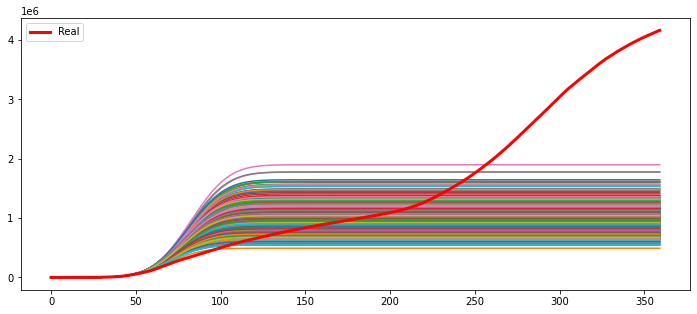

In [237]:
X = np.arange(data.shape[0])
plt.figure(figsize=(12, 5))
sampled_w = np.random.multivariate_normal(mu, sigma, N_SAMPLES)
max_values = []
for (w0, w1, w2) in sampled_w:
    y_pred = X**2 * w2 + X * w1 + w0
    y_pred = np.cumsum(np.exp(y_pred))
    max_values.append(max(y_pred))
    plt.plot(y_pred)
    
plt.plot(data['total_cases'], color='red', linewidth=3, label='Real')
plt.legend();

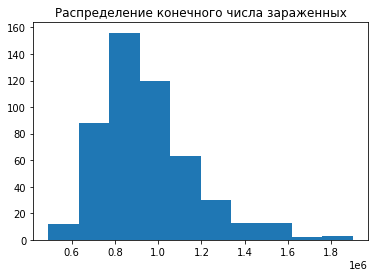

In [240]:
plt.hist(max_values)
plt.title('Распределение конечного числа зараженных');

In [250]:
print(f'Позитивный прогноз: {np.percentile(max_values, 10):.0f}')
print(f'Грустный прогноз: {np.percentile(max_values, 90):.0f}')

Позитивный прогноз: 706364
Грустный прогноз: 1217341


### 4 пункт

In [255]:
data = pd.read_csv('owid-covid-data.csv')
data.loc[data['new_cases'] <= 0, 'new_cases'] = 1

In [310]:
countries = {
    'Afghanistan': '2020-03-04',
    'Africa': '2020-02-28',
    'Albania': '2020-03-09',
    'Argentina': '2020-03-06',
    'Austria': '2020-02-28',
    'Azerbaijan': '2020-03-04',
    'Belarus': '2020-03-04',
    'Brazil': '2020-02-29',
    'France': '2020-01-24',
    'Georgia': '2020-03-01',
    'Germany': '2020-01-27',
    'Spain': '2020-02-24',
    'Mexico': '2020-02-28',
    'Russia': '2020-03-03',
    'Ukraine': '2020-03-13',
    'Greece': '2020-02-27', 
    'India': '2020-03-01',
    'Switzerland': '2020-02-25',
    'Vietnam': '2020-01-31',
    'Romania': '2020-02-28',
    'Portugal': '2020-03-02'
}

In [312]:
parameters = dict()
for country, begin_time in countries.items():
    temp_data = data[(data['location'] == country) & (data['date'] >= begin_time)]
    temp_data.reset_index(inplace=True)
    
    train = temp_data.iloc[:50]
    test = temp_data.iloc[50:]
    
    X_train = np.hstack((np.ones(train.shape[0]).reshape(-1, 1), 
                     train.index.values.reshape(-1, 1), 
                     (train.index.values ** 2).reshape(-1, 1)))
    y_train = np.log(train['new_cases'])
    
    ALPHA = 1
    lr_ridge = Ridge(alpha=ALPHA, fit_intercept=False)
    lr_ridge.fit(X_train, y_train)
    y_pred = lr_ridge.predict(X_train)
    y_pred_normal = np.cumsum(np.exp(y_pred))
    real_y_ln = np.log(train['total_cases'])
    pred_y_ln = np.log(y_pred_normal)
    sigma = np.mean((real_y_ln - pred_y_ln) ** 2)
    
    mu_0 = np.zeros(X_train.shape[1])
    sigma_0 = sigma * np.eye(X_train.shape[1])
    mu, sigma = bayesian_update(mu_0, sigma_0, X_train, y_train, sigma)
    parameters[country] = mu

Text(0.5, 1.0, 'w2 and w0')

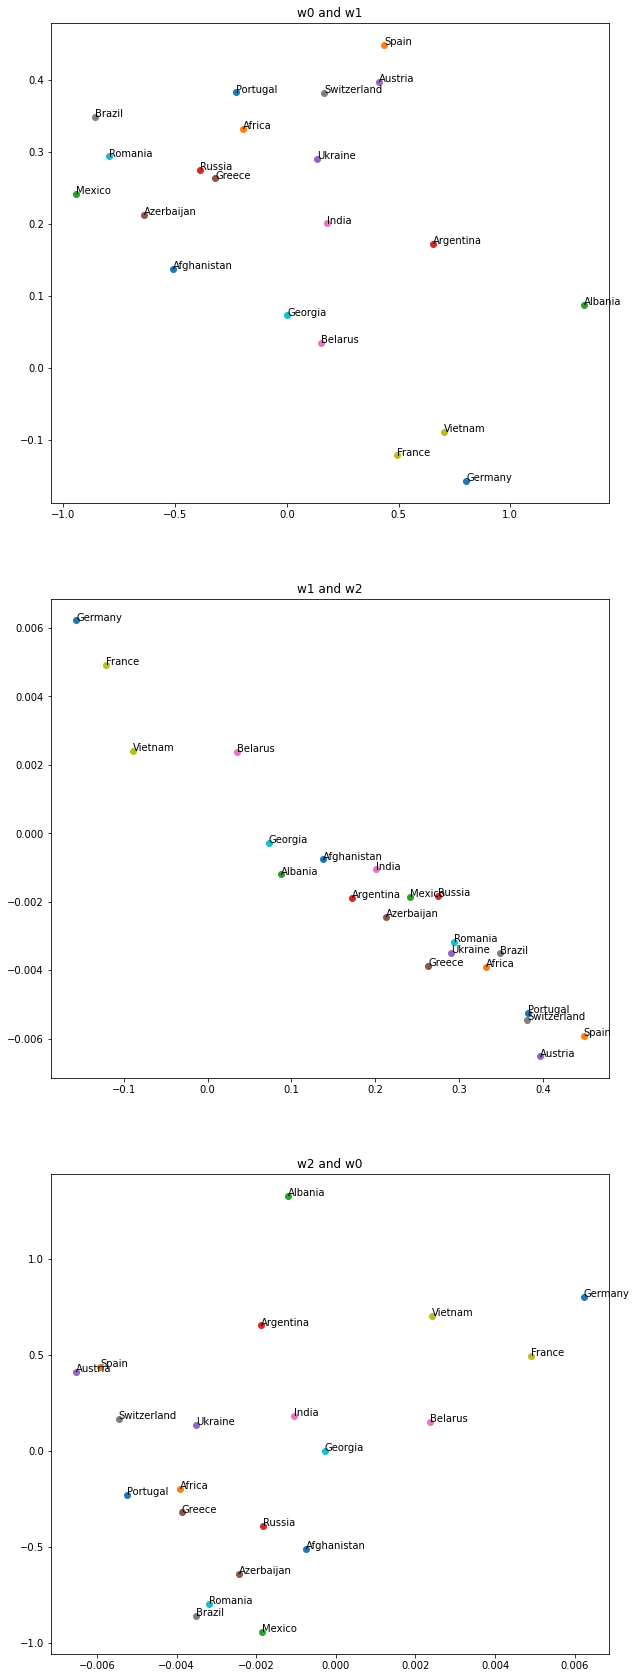

In [322]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 30))
for country, mu in parameters.items():
    ax1.scatter(mu[0], mu[1])
    ax1.annotate(country, (mu[0], mu[1]))
    
    ax2.scatter(mu[1], mu[2])
    ax2.annotate(country, (mu[1], mu[2]))
    
    ax3.scatter(mu[2], mu[0])
    ax3.annotate(country, (mu[2], mu[0]))

ax1.set_title('w0 and w1')
ax2.set_title('w1 and w2')
ax3.set_title('w2 and w0')

Никакой явной кластеризации нет, разве что с натяжкой на 1 и 2 графике, но логически интерпретировать удается с трудом, так что скорее всего так удачно сложилось.

#### 5 пункт

Сигмоида действительно достаточно хорошо описывает распространение пандемии, на графике для России видно, что в среднем она описывала правдоподобно, но вторая волна подпортила картину  
Как вариант принятия решения о карантине, можно построить график количества зараженных за день, и в случае, если скачок достаточно резкий, то стоит задуматься о закрытии всего (а-ля метод локтя)